# Multiclass Classification Lab

### Intro and objectives


### In this lab you will learn:
1. A basic example of a multiclass classifier

## What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

### In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.

#### Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset from OpenML.org

In [2]:


# Load data

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The sklearn.datasets package contains mostly three types of
functions: fetch_* functions such as fetch_openml() to download
real-life datasets, load_* functions to load small toy datasets bundled with
Scikit-Learn (so they don’t need to be downloaded over the internet), and
make_* functions to generate fake datasets, useful for tests. Generated
datasets are usually returned as an (X, y) tuple containing the input data
1
and the targets, both as NumPy arrays

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

#### There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset (Figure 3-1). All we need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function. We use cmap="binary" to get a grayscale color map where 0 is white and 255 is black:

In [6]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

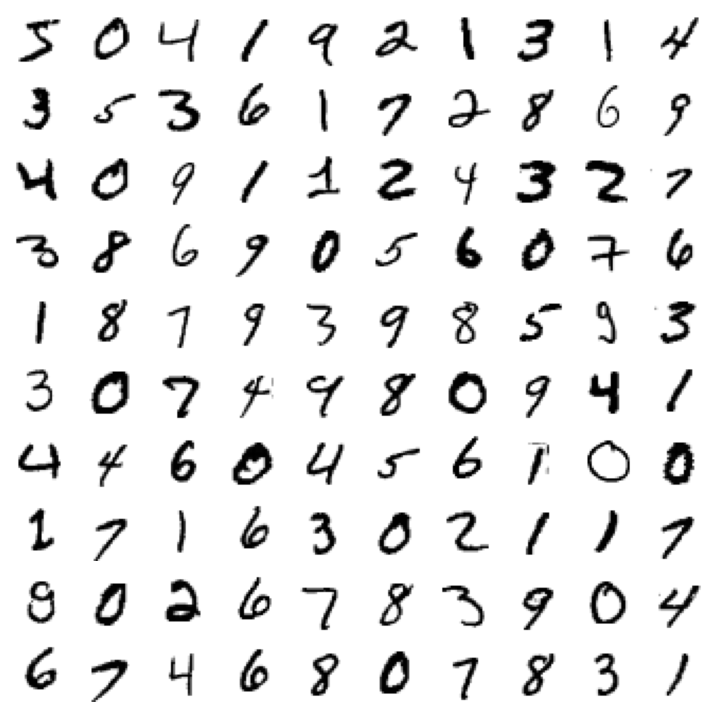

In [7]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)



## 1. Let's split the data into train and test sets

#### The MNIST dataset returned by fetch_openml() is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

#### We will only use 5000 instances to fit out classifier,it would take too long otherwise.



In [8]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 2. Let's train a multiclass classifier

#### Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

#### Some Scikit-Learn classifiers (e.g., LogisticRegression, RandomForestClassifier, and GaussianNB) are capable of handling multiple classes natively. Others are strictly binary classifiers (e.g., SGDClassifier and SVC). However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers.



#### We’ll only train on the first 2,000 images, or else it will take a very long time:

In [9]:



from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [10]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

#### The classifier guesses that this image represents a 5.

In [11]:
svm_clf.predict([X[10]])

array(['3'], dtype=object)

#### The classifier guesses that this image does not represents a 3.

## 3. Performance Measures

### 3.1. Measuring Accuracy Using Confusion Matrices

#### A good way to evaluate classifiers model is through confusion matrices. #### The general idea of a confusion matrix is to count the number of times instances of class A are classified as class B, for all A/B pairs.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

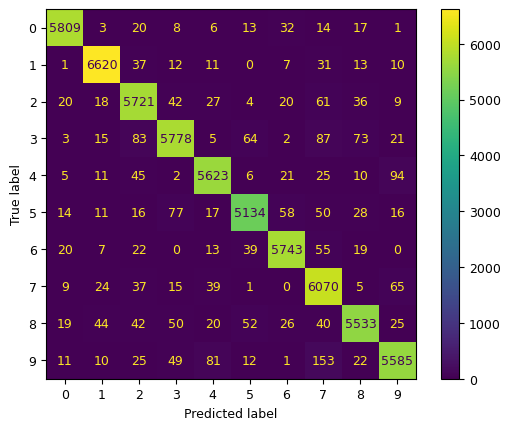

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


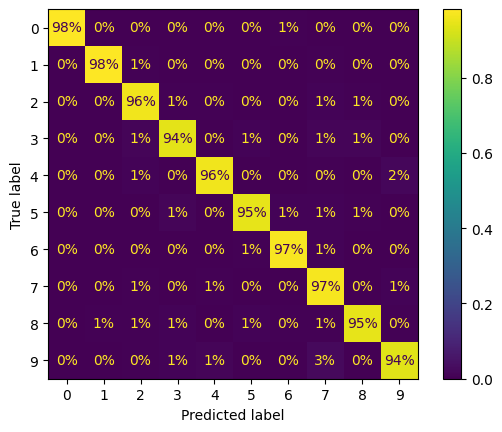

In [15]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

#### This confusion matrix looks pretty good: most images are on the main diagonal, which means that they were classified correctly. Notice that the cells on the diagonals in rows 3 and 9 are lower than the rest (94%), this means that the classifier is performing slightly worse for these categories.